In [5]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Suppress TensorFlow logging messages 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [7]:
def VisualizeAndAnalyzeDataset(dataset_directory):
    # Loop through all files in the directory
    for ImageFolderName in os.listdir(dataset_directory)[2]:
        ImageDir = os.path.join(dataset_directory, ImageFolderName)
        for ImageName in os.listdir(os.path.join(dataset_directory, ImageFolderName))[:3]:
            ImagePath=os.path.join (ImageDir, ImageName)
            # Check if the file is an image 
            if os.path.isfile(ImagePath) and ImageName.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read the image
                image = cv2.imread(ImagePath)
                img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
                results = hands.process(img_rgb)
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            img_rgb,
                            hand_landmarks,
                            mp_hands.HAND_CONNECTIONS,
                            mp_drawing_styles.get_default_hand_landmarks_style(),
                            mp_drawing_styles.get_default_hand_connections_style()
                        )
                plt.figure()
                plt.imshow(img_rgb)
    plt.show()

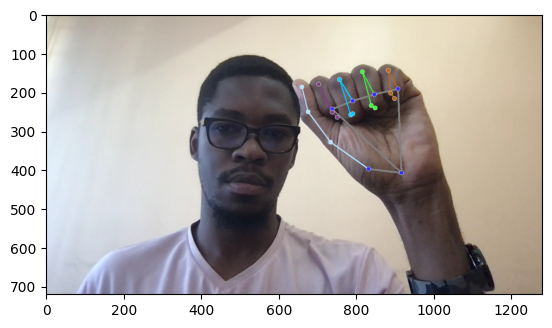

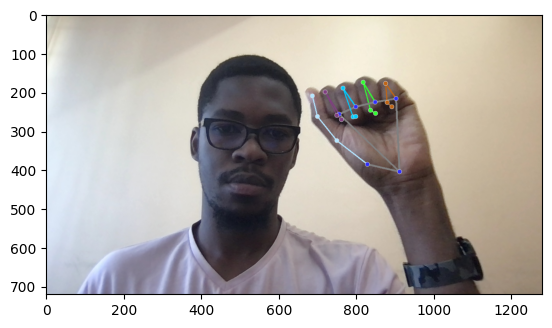

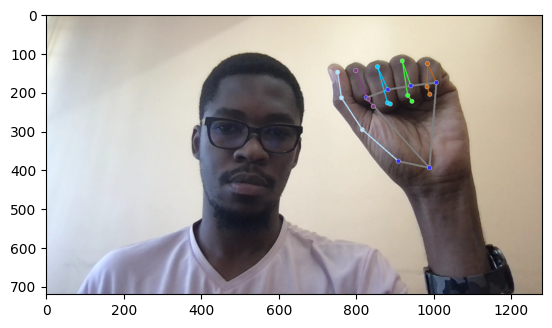

In [9]:
#implement code to call the VisualizeAndAnalyzeDataset function above
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

dataset_directory ='/Users/MkupeteJaah/Desktop/ProjectData/DataSet'
# Ensure the directory exists
if not os. path.exists(dataset_directory):
    print(f"Error: The directory '{dataset_directory}' does not exist.")
    exit()
#Callinng a function
VisualizeAndAnalyzeDataset(dataset_directory)

In [47]:
#import the required libraries
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np

In [48]:
#Create a function to process the dataset
def CreateDataset(dataset_directory):
    # Loop through all files in the directory
    for ImagesFolderName in tqdm(np.sort(os.listdir(dataset_directory)[1:])):
        ImageDir = os.path.join(dataset_directory, ImagesFolderName)
        for ImageName in os.listdir(os.path.join(dataset_directory, ImagesFolderName)):
            ImagePath = os.path.join(ImageDir, ImageName)
            
            # Check if the file is an image
            if os.path.isfile(ImagePath) and ImageName.lower().endswith(('.png', '.jpg', '.jpeg')):
                data_aux = []
    
                x_ = []
                y_ = []
                # Read the image
                image = cv2.imread(ImagePath)
    
                if image is not None:
                    
                    # Convert the image to RGB
                    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
                    # Extract the label and hand landmark from the image and create a list 
                    results = hands.process(img_rgb)
                    if results.multi_hand_landmarks:
                        
                        for hand_landmarks in results.multi_hand_landmarks:
                            for i in range(len(hand_landmarks.landmark)):
                                x = hand_landmarks.landmark[i].x
                                y = hand_landmarks.landmark[i].y
            
                                x_.append(x)
                                y_.append(y)
                               
                            for i in range(len(hand_landmarks.landmark)):
                                x = hand_landmarks.landmark[i].x
                                y = hand_landmarks.landmark[i].y
                                data_aux.append(x - min(x_))
                                data_aux.append(y - min(y_))
                               
                        data.append(data_aux)
                        labels.append(ImagesFolderName)
    return data,labels
            


In [49]:
dataset_directory = '/Users/MkupeteJaah/Desktop/ProjectData/DataSet'
# Ensure the directory exists
if not os.path.exists(dataset_directory):
    print(f"Error: The directory '{dataset_directory}' does not exist.")
    exit()

# Initialize lists to store extracted hand landmarks and labels 
data = []
labels = []
#call the function to create a data set
CreateDataset(dataset_directory)

#Storing the extracted dataset to a specified directory 
f = open('/Users/MkupeteJaah/Desktop/DataSets/data30.pickle', 'wb')  #open the file to write the dateset
pickle.dump({'data': data, 'labels': labels}, f)    #Write the data set to the directory
f.close()   #closse the file after writing the datasets

100%|█████████████████████████████████████████████| 8/8 [00:49<00:00,  6.20s/it]


In [50]:
#loading the data set from the directory
data_dict = pickle.load(open('/Users/MkupeteJaah/Desktop/DataSets/data30.pickle','rb'))

#Separete data and labels 
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [51]:
data

array([[0.20069587, 0.36689009, 0.13408977, ..., 0.08271898, 0.18648207,
        0.10211726],
       [0.17510599, 0.32034403, 0.11026603, ..., 0.07241648, 0.15988803,
        0.08834404],
       [0.18562853, 0.38140714, 0.12313324, ..., 0.09323269, 0.18640459,
        0.11986259],
       ...,
       [0.        , 0.20602804, 0.02673788, ..., 0.25272   , 0.17555778,
        0.24443346],
       [0.        , 0.18422055, 0.03532152, ..., 0.25811088, 0.18634777,
        0.2388804 ],
       [0.        , 0.1898275 , 0.05897111, ..., 0.24507678, 0.19233695,
        0.24562436]])

In [52]:
df = pd.DataFrame(data)
df

0         1         2         3         4         5         6   \
0    0.200696  0.366890  0.134090  0.353741  0.057551  0.257905  0.012452   
1    0.175106  0.320344  0.110266  0.293494  0.049050  0.208486  0.009976   
2    0.185629  0.381407  0.123133  0.358432  0.049899  0.245300  0.008346   
3    0.186698  0.378297  0.121431  0.358720  0.049206  0.246533  0.009381   
4    0.170483  0.308561  0.110473  0.284536  0.049996  0.205462  0.010006   
..        ...       ...       ...       ...       ...       ...       ...   
741  0.000000  0.177162  0.032314  0.066579  0.091658  0.022662  0.149578   
742  0.000000  0.208746  0.020588  0.109972  0.078981  0.064373  0.139518   
743  0.000000  0.206028  0.026738  0.095004  0.080716  0.029483  0.138248   
744  0.000000  0.184221  0.035322  0.055985  0.098277  0.010480  0.160422   
745  0.000000  0.189828  0.058971  0.053464  0.111306  0.025457  0.165128   

           7         8         9   ...        32        33        34  \
0    0.149069  0.000000  0.060562  ...  0.147540  0.135642  0.193250   
1    0.123459  0.000000  0.048960  ...  0.126652  0.111403  0.168324   
2    0.131713  0.000000  0.039647  ...  0.150465  0.143634  0.198990   
3    0.131589  0.000000  0.041658  ...  0.148194  0.142055  0.197406   
4    0.123907  0.000000  0.048518  ...  0.125588  0.113350  0.164963   
..        ...       ...       ...  ...       ...       ...       ...   
741  0.049457  0.188773  0.094995  ...  0.228707  0.198864  0.094211   
742  0.097655  0.173393  0.145277  ...  0.161654  0.207372  0.090405   
743  0.034418  0.179185  0.059447  ...  0.203437  0.189574  0.074902   
744  0.047204  0.198364  0.096650  ...  0.211525  0.185611  0.086155   
745  0.049141  0.209402  0.087223  ...  0.218197  0.180844  0.100324   

           35        36        37        38        39        40        41  
0    0.066593  0.174174  0.000000  0.178652  0.082719  0.186482  0.102117  
1    0.059219  0.147228  0.004482  0.150427  0.072416  0.159888  0.088344  
2    0.077978  0.181073  0.008846  0.180694  0.093233  0.186405  0.119863  
3    0.078623  0.181765  0.007128  0.180986  0.090562  0.185577  0.117679  
4    0.054728  0.141616  0.000000  0.145100  0.066739  0.155600  0.084204  
..        ...       ...       ...       ...       ...       ...       ...  
741  0.265787  0.168233  0.262857  0.192031  0.257209  0.201128  0.248858  
742  0.270633  0.167509  0.255140  0.168891  0.254386  0.153626  0.258227  
743  0.276977  0.146886  0.268049  0.169113  0.252720  0.175558  0.244433  
744  0.286058  0.173763  0.281156  0.190292  0.258111  0.186348  0.238880  
745  0.273769  0.169794  0.262129  0.187417  0.245077  0.192337  0.245624  

[746 rows x 42 columns]

In [53]:
df.describe()

0           1           2           3           4           5   \
count  746.000000  746.000000  746.000000  746.000000  746.000000  746.000000   
mean     0.108999    0.423910    0.083076    0.382361    0.067405    0.305290   
std      0.080378    0.155839    0.046809    0.179692    0.045224    0.170540   
min      0.000000    0.162120    0.006042    0.046190    0.000000    0.000000   
25%      0.032010    0.325282    0.047958    0.304779    0.030271    0.210571   
50%      0.112178    0.396129    0.068838    0.384058    0.055225    0.315341   
75%      0.163852    0.559457    0.107264    0.520375    0.098403    0.452640   
max      0.273010    0.804313    0.198896    0.737546    0.197073    0.668367   

               6           7           8           9   ...          32  \
count  746.000000  746.000000  746.000000  746.000000  ...  746.000000   
mean     0.072788    0.252586    0.083983    0.228152  ...    0.088373   
std      0.066362    0.156286    0.076811    0.148138  ...    0.053261   
min      0.000000    0.000000    0.000000    0.004427  ...    0.011676   
25%      0.013153    0.109802    0.004714    0.069633  ...    0.044925   
50%      0.051087    0.288063    0.073685    0.251855  ...    0.072628   
75%      0.139617    0.366045    0.172152    0.341865  ...    0.134065   
max      0.234840    0.610105    0.216243    0.555373  ...    0.240947   

               33          34          35          36          37          38  \
count  746.000000  746.000000  746.000000  746.000000  746.000000  746.000000   
mean     0.113871    0.122586    0.213449    0.125623    0.141757    0.116568   
std      0.083152    0.058784    0.110552    0.051443    0.108743    0.050716   
min      0.008826    0.000000    0.054401    0.003344    0.000000    0.007260   
25%      0.027917    0.100305    0.115623    0.107766    0.030584    0.087187   
50%      0.112400    0.126434    0.210653    0.134240    0.115675    0.116652   
75%      0.194295    0.168361    0.303284    0.161079    0.247590    0.164183   
max      0.325497    0.234587    0.440666    0.201310    0.314683    0.201580   

               39          40          41  
count  746.000000  746.000000  746.000000  
mean     0.128117    0.109496    0.116346  
std      0.085967    0.049974    0.082630  
min      0.002464    0.014590    0.000000  
25%      0.051750    0.073532    0.053493  
50%      0.086598    0.109766    0.109253  
75%      0.200799    0.152870    0.138736  
max      0.275299    0.216979    0.281734  

[8 rows x 42 columns]

In [41]:
labels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

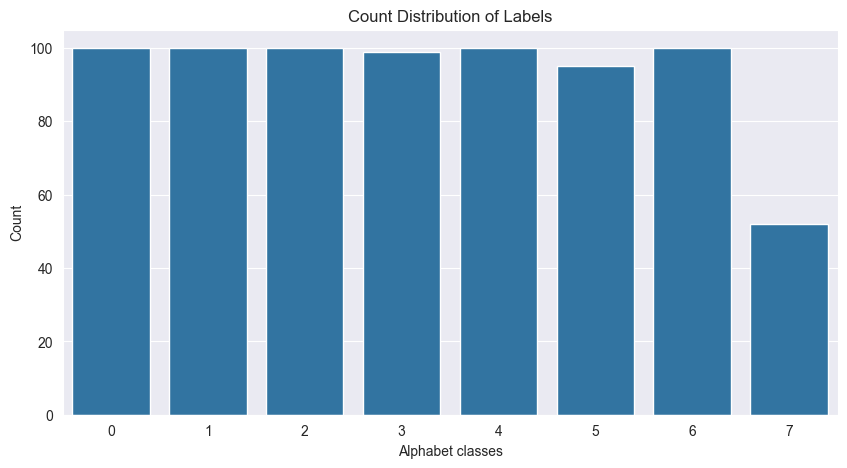

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming labels is a list or array containing categorical data
plt.figure(figsize=(10, 5))  # Create a figure window
sns.set_style("darkgrid")  # Set the plot style

sns.countplot(x=labels, orient="v")  # Create the count plot vertically

plt.xlabel("Alphabet classes")  # Add x-axis label (now on the bottom)
plt.ylabel("Count")  # Add y-axis label
plt.title("Count Distribution of Labels")  # Add a title

plt.show()  # Display the plot